## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# tell Jupyter Notebook to display matplotlib plots inline
# %matplotlib inline

## 2. Read the CSVs and Merge Datasets

In [3]:
# read species data
biodiversity = pd.read_csv('assets/species.csv', usecols=['Park Name', 'Category', 'Scientific Name', 'Common Names', 'Occurrence', 'Nativeness', 'Abundance', 'Conservation Status'])

In [4]:
biodiversity.head()

,Park Name,Category,Scientific Name,Common Names,Occurrence,Nativeness,Abundance,Conservation Status
0,Acadia National Park,Mammal,Alces alces,Moose,Present,Native,Rare,NaN
1,Acadia National Park,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Present,Native,Abundant,NaN
2,Acadia National Park,Mammal,Canis latrans,"Coyote, Eastern Coyote",Present,Not Native,Common,Species of Concern
3,Acadia National Park,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Not Confirmed,Native,NaN,Endangered
4,Acadia National Park,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Present,Unknown,Common,NaN


In [5]:
# read parks data
parks = pd.read_csv('assets/parks.csv', usecols=['Park Code', 'Park Name', 'State', 'Acres'])

In [6]:
parks.head()

,Park Code,Park Name,State,Acres
0,ACAD,Acadia National Park,ME,47390
1,ARCH,Arches National Park,UT,76519
2,BADL,Badlands National Park,SD,242756
3,BIBE,Big Bend National Park,TX,801163
4,BISC,Biscayne National Park,FL,172924


In [7]:
# merge datasets
df = pd.merge(parks, biodiversity, left_on='Park Name', right_on='Park Name')

In [8]:
df.head()

,Park Code,Park Name,State,Acres,Category,Scientific Name,Common Names,Occurrence,Nativeness,Abundance,Conservation Status
0,ACAD,Acadia National Park,ME,47390,Mammal,Alces alces,Moose,Present,Native,Rare,NaN
1,ACAD,Acadia National Park,ME,47390,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Present,Native,Abundant,NaN
2,ACAD,Acadia National Park,ME,47390,Mammal,Canis latrans,"Coyote, Eastern Coyote",Present,Not Native,Common,Species of Concern
3,ACAD,Acadia National Park,ME,47390,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Not Confirmed,Native,NaN,Endangered
4,ACAD,Acadia National Park,ME,47390,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Present,Unknown,Common,NaN


## 3. Clean the data

In [9]:
# check for whitespace in column names
list(df.columns)

['Park Code',
 'Park Name',
 'State',
 'Acres',
 'Category',
 'Scientific Name',
 'Common Names',
 'Occurrence',
 'Nativeness',
 'Abundance',
 'Conservation Status']

In [10]:
# check dtypes
df.dtypes

Park Code              object
Park Name              object
State                  object
Acres                   int64
Category               object
Scientific Name        object
Common Names           object
Occurrence             object
Nativeness             object
Abundance              object
Conservation Status    object
dtype: object

## 4. Analyze data

### Most biodiverse parks

In [11]:
# count species
count_species = df['Park Name'].value_counts()

In [12]:
# show the top 20 parks with the most species/biodiversity
count_species.head(20)

Great Smoky Mountains National Park    6623
Redwood National Park                  6310
Shenandoah National Park               4655
Death Valley National Park             4439
Yellowstone National Park              3966
Crater Lake National Park              3760
North Cascades National Park           3363
Hawaii Volcanoes National Park         3298
Rocky Mountain National Park           3152
Great Basin National Park              2653
Grand Canyon National Park             2622
Haleakala National Park                2580
Glacier National Park                  2556
Mammoth Cave National Park             2499
Congaree National Park                 2321
Joshua Tree National Park              2294
Big Bend National Park                 2269
Yosemite National Park                 2088
Everglades National Park               2084
Grand Teton National Park              2030
Name: Park Name, dtype: int64

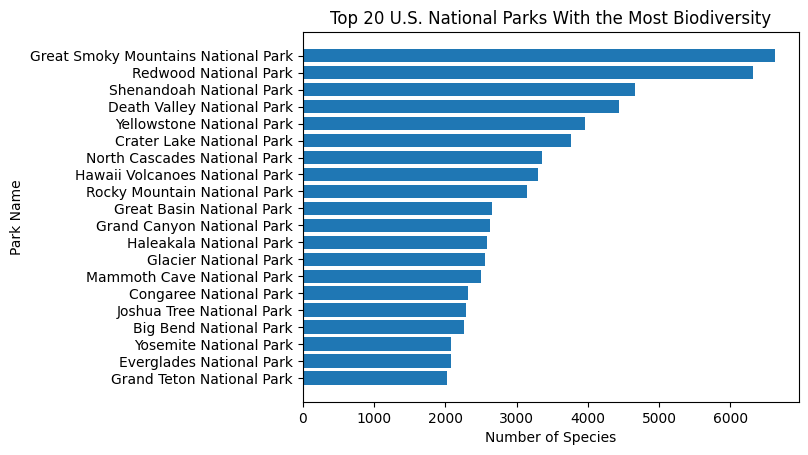

In [13]:
# plot the top 20 parks with the most species/biodiversity

top_20_parks = count_species.head(20)

x = top_20_parks.index
y = top_20_parks.values

plt.barh(x, y)
plt.gca().invert_yaxis()
plt.xlabel('Number of Species')
plt.ylabel('Park Name')
plt.title('Top 20 U.S. National Parks With the Most Biodiversity')

plt.show()

### Category most prevalent in the parks

In [14]:
# df['Category'].value_counts()

### Category of species most present in each park

In [15]:
# df.groupby('Park Name')['Category'].max()

### Category of species least present in each park

In [16]:
# df.groupby('Park Name')['Category'].min()

### Size of park and biodiversity

In [17]:
# group by park name
group_by_park = df.groupby('Park Name')

In [18]:
# create variable for size of park 
park_size = group_by_park['Acres'].max()

In [19]:
# sort in descending order
sorted_park_size = park_size.sort_values(ascending=False)
sorted_park_size

Park Name
Wrangell - St Elias National Park and Preserve    8323148
Gates Of The Arctic National Park and Preserve    7523898
Death Valley National Park                        4740912
Katmai National Park and Preserve                 3674530
Denali National Park and Preserve                 3372402
Glacier Bay National Park and Preserve            3224840
Lake Clark National Park and Preserve             2619733
Yellowstone National Park                         2219791
Kobuk Valley National Park                        1750717
Everglades National Park                          1508538
Grand Canyon National Park                        1217403
Glacier National Park                             1013572
Olympic National Park                              922651
Sequoia and Kings Canyon National Parks            865952
Big Bend National Park                             801163
Joshua Tree National Park                          789745
Yosemite National Park                             761266
Kena

In [20]:
count_species

Great Smoky Mountains National Park               6623
Redwood National Park                             6310
Shenandoah National Park                          4655
Death Valley National Park                        4439
Yellowstone National Park                         3966
Crater Lake National Park                         3760
North Cascades National Park                      3363
Hawaii Volcanoes National Park                    3298
Rocky Mountain National Park                      3152
Great Basin National Park                         2653
Grand Canyon National Park                        2622
Haleakala National Park                           2580
Glacier National Park                             2556
Mammoth Cave National Park                        2499
Congaree National Park                            2321
Joshua Tree National Park                         2294
Big Bend National Park                            2269
Yosemite National Park                            2088
Everglades

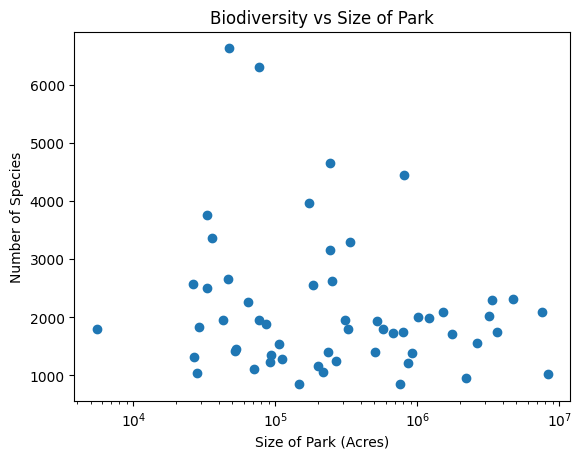

In [21]:
# create scatter plot of park size and species count

plt.scatter(park_size, count_species)
plt.xlabel('Size of Park (Acres)')
plt.ylabel('Number of Species')
plt.title('Biodiversity vs Size of Park')
plt.xscale('log')

plt.show()

The scatter plot shows a wide range of variation in biodiversity for a given park size. This suggests that there are other variables that factor into the biodiversity in a park.